## Задание 1   
Завершаем практическое задание №2. Необходимо для каждой распознанной фамилии вывести на экран наиболее подходящий вариант из стартового протокола

In [2]:
import Levenshtein

In [13]:
claim_list = [
    'Шехавцова Анна',
    'Гречихина Наталья',
    'Козлова Алена',
    'Груздева Алина',
    'Кущенко Анна',
    'Чистякова Анастасия'
]

speech_recognition = [
    'кучменко она',
    'козлова оксана',
    'груздь алина',
    'рычихина наталья',
    'шиховцева на',
    'чистова анастасия'
]

In [56]:
for recognized_name in speech_recognition:
    distances={}
    for real_name in claim_list:
        distances = {real_name: Levenshtein.distance(recognized_name, real_name) for real_name in claim_list}
    print("Наиболее близкое имя:{}       \t Распознанная речь: {}".format(sorted(distances.items(), key = lambda x: x[1])[0][0],recognized_name))

Наиболее близкое имя:Кущенко Анна       	 Распознанная речь: кучменко она
Наиболее близкое имя:Козлова Алена       	 Распознанная речь: козлова оксана
Наиболее близкое имя:Груздева Алина       	 Распознанная речь: груздь алина
Наиболее близкое имя:Гречихина Наталья       	 Распознанная речь: рычихина наталья
Наиболее близкое имя:Шехавцова Анна       	 Распознанная речь: шиховцева на
Наиболее близкое имя:Чистякова Анастасия       	 Распознанная речь: чистова анастасия


## Задание 2   
Постройте модель kNN для распознавания цифр. Посчитайте получившееся значение точности (последняя строка в файле 7. kNN digits.ipynb)

In [18]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

Загрузим датасет

In [2]:
digits = datasets.load_digits()

<Figure size 432x288 with 0 Axes>

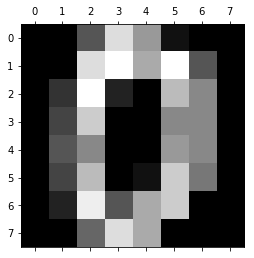

In [3]:
plt.gray()
for i in range(0, 1):
    plt.matshow(digits.images[i])
    
plt.show() 

In [4]:
X_digits = digits.data
Y_digits = digits.target

Разделим на train и test

In [30]:
n_samples = len( X_digits )
split = int( n_samples * .9 )
X_train = X_digits[:split]
Y_train = Y_digits[:split]

X_test = X_digits[split:]
Y_test = Y_digits[split:]

C использованием GridsearchCV подберем оптимальные гиперпараметры

In [31]:
neighbors = range(3,6)
leaf_size= range(20,31)
grid = {'n_neighbors': neighbors, 'leaf_size': leaf_size}
gridsearch = GridSearchCV(KNeighborsClassifier(), grid, scoring='neg_log_loss', cv=5)
gridsearch.fit(X_train, Y_train)

D:\Netology\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(3, 6), 'leaf_size': range(20, 31)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [32]:
gridsearch.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=21, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Построим модель с оптимальными гиперпараметрами:

In [36]:
clf_knn = KNeighborsClassifier(n_neighbors=5,leaf_size=30)
clf_knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Посчитаем скор на тестовой выборке:

In [37]:
clf_knn.score(X_test,Y_test )

0.9611111111111111